In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath as cm

%matplotlib inline

In [32]:
# Continuous signal
start = 0
stop = 0.001
sampling_frequency = 8000
samples_count = sampling_frequency * (stop-start)

# Continuous
t = np.linspace(start=start, stop=stop, num=int(samples_count))
y_continuous = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + (3*np.pi)/4)

In [33]:
# Discrete signal
start = 0
stop = 0.001
sampling_frequency = 8000
sampling_rate = 1/sampling_frequency
N = 8

# Base
n = np.arange(start=start, stop=1, step=sampling_rate)
y_discrete = np.sin(2 * np.pi * 1000 * n) + 0.5 * np.sin(2 * np.pi * 2000 * n + (3*np.pi)/4)
y_discrete = y_discrete[:8]

print("Sampled n: ", n)
print("Sampled y: ", y_discrete)

Sampled n:  [0.00000e+00 1.25000e-04 2.50000e-04 ... 9.99625e-01 9.99750e-01
 9.99875e-01]
Sampled y:  [ 0.35355339  0.35355339  0.64644661  1.06066017  0.35355339 -1.06066017
 -1.35355339 -0.35355339]


In [34]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for m in range(N):
        for n in range(N):
            X[m] += x[n] * np.exp(-2j * np.pi * m * n / N)
    return X

In [35]:
def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for m in range(N):
            x[n] += X[m] * np.exp(2j * np.pi * m * n / N)
        x[n] = x[n]/N
    return x

In [36]:
def make_round_complex(x):
    n = len(x)
    rounded = []
    for i in range(N):
        temp = round(x[i].real, 3) + round(x[i].imag, 3) * 1j
        rounded.append(temp)
    rounded = np.array(rounded)
    return rounded

In [37]:
def get_phases(x):
    phases = []
    for i in x:
        temp = cm.phase(round(i.real, 2) + round(i.imag, 2) * 1j)
        phases.append(math.degrees(temp))
    return phases

In [38]:
y_dft = dft(y_discrete)
y_dft = make_round_complex(y_dft)
y_phases = get_phases(y_dft)
y_idft = idft(y_dft)
y_idft = make_round_complex(y_idft)

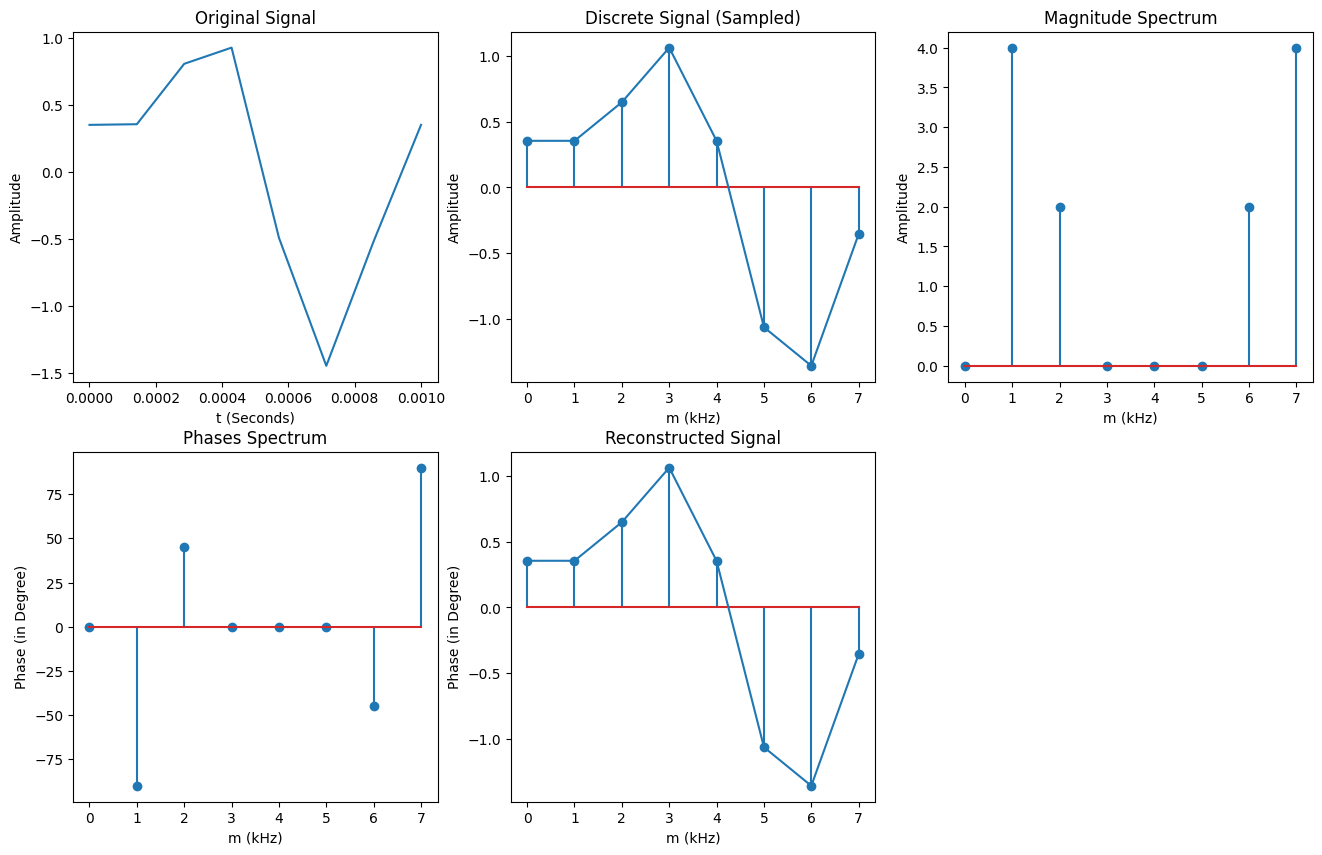

In [39]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(f'Original Signal')
plt.xlabel("t (Seconds)")
plt.ylabel("Amplitude")
plt.plot(t, y_continuous)

plt.subplot(2, 3, 2)
plt.title(f'Discrete Signal (Sampled)')
plt.xlabel("m (kHz)")
plt.ylabel("Amplitude")
plt.stem(range(len(y_discrete)), y_discrete)
plt.plot(range(len(y_discrete)), y_discrete)

plt.subplot(2, 3, 3)
plt.title(f'Magnitude Spectrum')
plt.xlabel("m (kHz)")
plt.ylabel("Amplitude")
plt.stem(range(len(y_dft)), np.abs(y_dft))

plt.subplot(2, 3, 4)
plt.title(f'Phases Spectrum')
plt.xlabel("m (kHz)")
plt.ylabel("Phase (in Degree)")
plt.stem(range(len(y_phases)), y_phases)

plt.subplot(2, 3, 5)
plt.title(f'Reconstructed Signal')
plt.xlabel("m (kHz)")
plt.ylabel("Phase (in Degree)")
plt.stem(range(len(y_idft)), y_idft.real)
plt.plot(range(len(y_idft)), y_idft.real)